## Problem 1 - Duality Practice


Consider the following primal linear program:

\begin{alignat*}{5}
\max \ & z = & 7 x_1 & - & 3 x_2 & + & 2 x_3 &+& x_4 &\\
\text{s.t. } & & x_1 & - &   x_2 &   &       & &    & = 5\\
             & &     &   & 4 x_2 & + & 6 x_3 & &    & \leq 9\\
             & & x_1&   &       & - & x_3   &-& 2 x_4 &\leq 4\\
             & &  x_1& \geq 0, &x_2 &\text{ Free },& x_3 &\geq 0,& x_4 &\leq 0
\end{alignat*}


Write the dual of this linear program.

**Answer:**
\begin{alignat*}{5}
\min \ & d = & 5 y_1 & + & 9 y_2 & + & 4 y_3 &\\
\text{s.t. } & &   & y_1 &   &       &   & y_3 &\geq 7\\
             & & - & y_1 & + &   & 4 y_2 &   &      &= -3\\
             & &   &     &   &   & 6 y_2 & - & y_3  &\geq 2\\
             & &   &     &   &   &       & - & 2 y_3&\leq 1\\
             & & y_1 &\text{ Free }\\
             & & y_2 &\geq 0\\
             & & y_3 &\geq 0
\end{alignat*}

## Problem 2 - Max Flow Formulation

Formulate a __maximum flow problem__ that will help determine which types planes should fly which routes in order to cover all the required routes, if possible.  Draw the network and label the capacities of the
arcs. Implement this model in Julia/JuMP and determine if it is possible for Delta to cover the routes with the current fleet.

**Answer: Yes, Delta can cover the routes with the current fleet.**

In [1]:
using JuMP, Clp

# (rows are nodes, columns are arcs, entries represent whether arc enters (-1) or leaves (1) each node)
# S A B C D R1 R2 R3 R4 T
#    sa sb sc sd ar1 ar2 ar3 ar4 br1 br3 br4 cr2 cr3 dr3 r1t r2t r3t r4t ts
A = [1  1  1  1  0   0   0   0   0   0   0   0   0   0   0   0   0   0   -1
    -1  0  0  0  1   1   1   1   0   0   0   0   0   0   0   0   0   0    0
     0 -1  0  0  0   0   0   0   1   1   1   0   0   0   0   0   0   0    0
     0  0  -1 0  0   0   0   0   0   0   0   1   1   0   0   0   0   0    0
     0  0  0 -1  0   0   0   0   0   0   0   0   0   1   0   0   0   0    0
     0  0  0  0  -1  0   0   0  -1   0   0   0   0   0   1   0   0   0    0
     0  0  0  0  0   -1  0   0   0   0   0   -1  0   0   0   1   0   0    0
     0  0  0  0  0   0   -1  0   0   -1  0   0   -1  -1  0   0   1   0    0
     0  0  0  0  0   0   0   -1  0   0   -1  0   0   0   0   0   0   1    0
     0  0  0  0  0   0   0   0   0   0   0   0   0   0   -1  -1  -1  -1   1] 
# print(size(A))

# supply and demand are all 0
b = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# print(length(b))

# costs should be 0 on every arc except dummy (-1)
c = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, -1]
# print(length(c))

# capacities on each arc
#      sa  sb  sc sd ar1 ar2 ar3 ar4 br1 br3 br4 cr2 cr3 dr3 r1t r2t r3t r4t ts
cap = [25, 17, 12, 9, 25, 25, 25, 25, 17, 17, 17, 12, 12, 9, 9, 12, 10, 15, 46]
# print(cap[1:14])

m = Model(Clp.Optimizer)

# variables representing how much flow we send on each arc
@variable(m, x[1:19] >= 0)

# constraints balance flow into and out of each node
@constraint(m, A*x .== b)

# don't exceed arc capacity
@constraint(m, x[1: 14] .<= cap[1:14]) # include start and end
@constraint(m, x[15:19] .== cap[15:19])

# minimize the total cost (same as maximizing flow through dummy arc)
@objective(m, Min, sum(c[i]*x[i] for i in 1:19))

# solve this instance of the max flow problem
optimize!(m)

# print out the flow on each arc along with total flow
println("Max flow: ", -objective_value(m)) # need to take negative
#      sa  sb  sc sd ar1 ar2 ar3 ar4 br1 br3 br4 cr2 cr3 dr3 r1t r2t r3t r4t ts
println("Flow on each arc: ")
println("s-a: ", value(x[1]))
println("s-b: ", value(x[2]))
println("s-c: ", value(x[3]))
println("s-d: ", value(x[4]))
println("a-r1: ", value(x[5]))
println("a-r2: ", value(x[6]))
println("a-r3: ", value(x[7]))
println("a-r4: ", value(x[8]))
println("b-r1: ", value(x[9]))
println("b-r3: ", value(x[10]))
println("b-r4: ", value(x[11]))
println("c-r2: ", value(x[12]))
println("c-r3: ", value(x[13]))
println("d-r3: ", value(x[14]))
println("r1-t: ", value(x[15]))
println("r2-t: ", value(x[16]))
println("r3-t: ", value(x[17]))
println("r4-t: ", value(x[18]))
println("t-s (Dummy): ", value(x[19]))

Max flow: 46.0
Flow on each arc: 
s-a: 25.0
s-b: 0.0
s-c: 12.0
s-d: 9.0
a-r1: 9.0
a-r2: 0.0
a-r3: 1.0
a-r4: 15.0
b-r1: 0.0
b-r3: 0.0
b-r4: 0.0
c-r2: 12.0
c-r3: 0.0
d-r3: 9.0
r1-t: 9.0
r2-t: 12.0
r3-t: 10.0
r4-t: 15.0
t-s (Dummy): 46.0
Coin0506I Presolve 5 (-24) rows, 9 (-10) columns and 18 (-39) elements
Clp0006I 0  Obj -46 Primal inf 78.199996 (5)
Clp0006I 7  Obj -46
Clp0000I Optimal - objective value -46
Coin0511I After Postsolve, objective -46, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -46 - 7 iterations time 0.002, Presolve 0.00


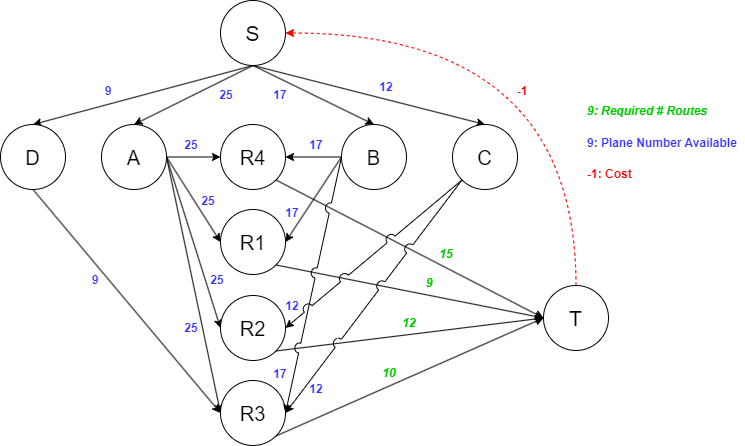

In [2]:
display("image/png", read("p02_maxFlowNetork.png"))

## Problem 3 - Craft Brewing Duality

\begin{alignat*}{5}
\max \ & z = & 60x_1 &+& 120x_2 &+& 200x_3 &+&  300x_4 & \\
\text{s.t. } & & 2x_1 &+& 3x_2 &+&3x_3&+&5 x_4 & \leq 12000 \\
     & & 5x_1 &+& 5x_2 &+&10x_3 &+&15x_4 & \leq 32000 \\
	  & & 0.25 x_1 &+& x_2 &+&2x_3 &+& 3.5 x_4 & \leq 5000\\
  & & x_1& \geq 0, \ &x_2 &\geq 0, &x_3 &\geq 0, &x_4& \geq 0
\end{alignat*}

In the sensitivity analysis questions below, answer each question independnetly -- e.g., when answering part (c),
consider only the changes suggested in part (c), not those in addition to the ones considered in part (b).


(a) Solve this model in Julia/JuMP and write the optimal primal and dual solutions, and the optimal objective function value. (To obtain the dual solution associated with a constraint called "c1" in JuMP, use the command "dual(c1)" )

**Answer: Primal Solution**

In [3]:
using JuMP, Clp

#create a new model object
m = Model(Clp.Optimizer)

# variables for 4 bear
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@variable(m, x3 >= 0)
@variable(m, x4 >= 0)

# objective is to maximize profit
@objective(m, Max, 60*x1 + 120*x2 + 200*x3 + 300*x4)

# constraint on the labor available
@constraint(m, labor_con, 2*x1 + 3*x2 + 3*x3 + 5*x4 <= 12000)
#constraint on the vat available
@constraint(m, vat_con, 5*x1 + 5*x2 + 10*x3 + 15*x4 <= 32000)
#constraint on the inventory available
@constraint(m, inv_con, 0.25*x1 + x2 + 2*x3 + 3.5*x4 <= 5000)

optimize!(m)

println("Optimal Primal Solution:")
println("Produce ", value(x1), " kegs of Beer1.")
println("Produce ", value(x2), " kegs of Beer2.")
println("Produce ", value(x3), " kegs of Beer3.")
println("Produce ", value(x4), " kegs of Beer4.")
println("Total profit will be \$", objective_value(m), " (the optimal objective function value).")

Optimal Primal Solution:
Produce 1866.6666666666665 kegs of Beer1.
Produce 977.777777777778 kegs of Beer2.
Produce 1777.7777777777774 kegs of Beer3.
Produce 0.0 kegs of Beer4.
Total profit will be $584888.8888888889 (the optimal objective function value).
Coin0506I Presolve 3 (0) rows, 4 (0) columns and 12 (0) elements
Clp0006I 0  Obj 0 Dual inf 380.83786 (4)
Clp0006I 3  Obj 584888.89
Clp0000I Optimal - objective value 584888.89
Clp0032I Optimal objective 584888.8889 - 3 iterations time 0.002


**Answer: Dual Solution**

In [4]:
using JuMP, Clp

m = Model(Clp.Optimizer)
@variable(m, λ[1:3] >= 0) # variables for each primal constraint

# constraints ensuring the correct relationship with each primal variable
# to guarantee an upper bound 
@constraint(m, const_b1, 2λ[1] + 5λ[2] + 0.25λ[3] >= 60)
@constraint(m, const_b2, 3λ[1] + 5λ[2] + λ[3] >= 120)
@constraint(m, const_b3, 3λ[1] + 10λ[2] + 2λ[3] >= 200)
@constraint(m, const_b4, 5λ[1] + 15λ[2] + 3.5λ[3] >= 300)

# objective is to minimize the upper bound on the primal solution
@objective(m, Min, 12000*λ[1] + 32000*λ[2] + 5000*λ[3])

# solve this instance of the Top Brass dual
optimize!(m)

# print the dual model and solution
println(m)

println("dual variables are: ", value.(λ))
println("Optimal objective is: ", objective_value(m))

Min 12000 λ[1] + 32000 λ[2] + 5000 λ[3]
Subject to
 const_b1 : 2 λ[1] + 5 λ[2] + 0.25 λ[3] >= 60
 const_b2 : 3 λ[1] + 5 λ[2] + λ[3] >= 120
 const_b3 : 3 λ[1] + 10 λ[2] + 2 λ[3] >= 200
 const_b4 : 5 λ[1] + 15 λ[2] + 3.5 λ[3] >= 300
 λ[1] >= 0
 λ[2] >= 0
 λ[3] >= 0

dual variables are: [13.333333333333332, 3.555555555555556, 62.22222222222221]
Optimal objective is: 584888.8888888888
Coin0506I Presolve 4 (0) rows, 3 (0) columns and 12 (0) elements
Clp0006I 0  Obj 0 Primal inf 76 (4)
Clp0006I 3  Obj 584888.89
Clp0000I Optimal - objective value 584888.89
Clp0032I Optimal objective 584888.8889 - 3 iterations time 0.002


In [5]:
if dual(const_b1) > 0
    println("Beer1 has no slack.")
end
if dual(const_b2) > 0
    println("Beer2 has no slack.")
end
if dual(const_b3) > 0
    println("Beer3 has no slack.")
end
if dual(const_b4) > 0
    println("Beer4 has no slack.")
end

Beer1 has no slack.
Beer2 has no slack.
Beer3 has no slack.


(b) What is the maximum amount the brewery should be willing to pay for an additional hour of labor?

**Answer: The maximum amount the brewery is willing to pay for an additional hour of labor is $13.33.**

(c) The marketing department is considering running an advertising campaign that would increase the profit per keg of beer $2$ by $\$10$ and beer $3$ by $\$15$.  Provide an estimate of the new optimal profit ($z^*_{NEW}$) after this change and indicate if your estimate is a lower or upper bound on the new optimal profit. Your answer should be of the form $z^*_{NEW} \geq \underline{\phantom{aaaa}}$ or  $z^*_{NEW} \leq \underline{\phantom{aaaa}}$, where you fill in a number in the blank.

**Answer:** 
$z^*_{NEW} \geq 584888.88$. **(new optimal profit >= original optimal profit)**

In [6]:
using JuMP, Clp

#create a new model object
m = Model(Clp.Optimizer)

# variables for 4 bear
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@variable(m, x3 >= 0)
@variable(m, x4 >= 0)

# objective is to maximize profit
# increase the profit per keg of beer $2 by $10 and beer 3 by $15.
@objective(m, Max, 60*x1 + 130*x2 + 215*x3 + 300*x4)

# constraint on the labor available
@constraint(m, labor_con, 2*x1 + 3*x2 + 3*x3 + 5*x4 <= 12000)
#constraint on the vat available
@constraint(m, vat_con, 5*x1 + 5*x2 + 10*x3 + 15*x4 <= 32000)
#constraint on the inventory available
@constraint(m, inv_con, 0.25*x1 + x2 + 2*x3 + 3.5*x4 <= 5000)

optimize!(m)

println("Optimal Primal Solution:")
println("Produce ", value(x1), " kegs of Beer1.")
println("Produce ", value(x2), " kegs of Beer2.")
println("Produce ", value(x3), " kegs of Beer3.")
println("Produce ", value(x4), " kegs of Beer4.")
println("Total profit will be \$", objective_value(m), " (the optimal objective function value).")

Optimal Primal Solution:
Produce 1866.6666666666665 kegs of Beer1.
Produce 977.777777777778 kegs of Beer2.
Produce 1777.7777777777774 kegs of Beer3.
Produce 0.0 kegs of Beer4.
Total profit will be $621333.3333333333 (the optimal objective function value).
Coin0506I Presolve 3 (0) rows, 4 (0) columns and 12 (0) elements
Clp0006I 0  Obj 0 Dual inf 397.20761 (4)
Clp0006I 3  Obj 621333.33
Clp0000I Optimal - objective value 621333.33
Clp0032I Optimal objective 621333.3333 - 3 iterations time 0.002


(d) The brewery is considering a facility redesign that would decrease the labor availability by 1000 hours, but increase the vat availabity by 4000 hours. Provide an estimate of the new optimal profit ($z^*_{NEW}$) after this change and indicate if your estimate is a lower or upper bound on the new optimal profit. Your answer should be of the form $z^*_{NEW} \geq \underline{\phantom{aaaa}}$ or  $z^*_{NEW} \leq \underline{\phantom{aaaa}}$, where you fill in a number in the blank.

**Answer:** 
$z^*_{NEW} \leq 584888.88$. **(new optimal profit <= original optimal profit)**

In [7]:
using JuMP, Clp

#create a new model object
m = Model(Clp.Optimizer)

# variables for 4 bear
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@variable(m, x3 >= 0)
@variable(m, x4 >= 0)

# objective is to maximize profit
@objective(m, Max, 60*x1 + 120*x2 + 200*x3 + 300*x4)

# constraint on the labor available
@constraint(m, labor_con, 2*x1 + 3*x2 + 3*x3 + 5*x4 <= 11000)
#constraint on the vat available
@constraint(m, vat_con, 5*x1 + 5*x2 + 10*x3 + 15*x4 <= 36000)
#constraint on the inventory available
@constraint(m, inv_con, 0.25*x1 + x2 + 2*x3 + 3.5*x4 <= 5000)

optimize!(m)

println("Optimal Primal Solution:")
println("Produce ", value(x1), " kegs of Beer1.")
println("Produce ", value(x2), " kegs of Beer2.")
println("Produce ", value(x3), " kegs of Beer3.")
println("Produce ", value(x4), " kegs of Beer4.")
println("Total profit will be \$", objective_value(m), " (the optimal objective function value).")

Optimal Primal Solution:
Produce 2153.8461538461543 kegs of Beer1.
Produce 0.0 kegs of Beer2.
Produce 2230.769230769231 kegs of Beer3.
Produce 0.0 kegs of Beer4.
Total profit will be $575384.6153846155 (the optimal objective function value).
Coin0506I Presolve 3 (0) rows, 4 (0) columns and 12 (0) elements
Clp0006I 0  Obj 0 Dual inf 380.83786 (4)
Clp0006I 2  Obj 575384.62
Clp0000I Optimal - objective value 575384.62
Clp0032I Optimal objective 575384.6154 - 2 iterations time 0.002


(e) The brewery is considering a new beer that they would sell to Der Rathskeller for profit per keg of \\$400. This beer would require 10 labor hours per keg and on average each keg would use 4 vat hours. Let $T$ denote the average time a keg of the new beer spends in inventory.  Provide a bound on the value of $T$  in order for this new beer to potentially be profitable. Your answer should be of the form $T \geq \underline{\phantom{aaaa}}$ or  $T \leq \underline{\phantom{aaaa}}$, where you fill in a number in the blank. (You probably won't be able to find a closed-form solution to this question; it's okay to "guess and check" to estimate bounds on $T$.)

**Answer:** 
$T \leq  4.057$. 

In [8]:
using JuMP, Clp

#create a new model object
m = Model(Clp.Optimizer)

@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@variable(m, x3 >= 0)
@variable(m, x4 >= 0)
@variable(m, x5 >= 0)

# objective is to maximize profit
@objective(m, Max, 60*x1 + 120*x2 + 200*x3 + 300*x4 + 400*x5)

# constraint on the labor available
@constraint(m, labor_con, 2*x1 + 3*x2 + 3*x3 + 5*x4 + 10*x5 <= 12000)
#constraint on the vat available
@constraint(m, vat_con, 5*x1 + 5*x2 + 10*x3 + 15*x4 + 4*x5<= 32000)
#constraint on the inventory available
# guess T
# T = 3  # $594285, with 142 kegs
# T = 4  # $584888, with 134 kegs
# T = 4.06  # $584888, with 0 keg
# T = 4.055  # $584906, with 133 keg
T = 4.057  # $584890, with 133 keg
@constraint(m, inv_con, 0.25*x1 + x2 + 2*x3 + 3.5*x4 + T*x5 <= 5000)

optimize!(m)

println("Optimal Primal Solution:")
println("Produce ", value(x1), " keg(s) of Beer1.")
println("Produce ", value(x2), " keg(s) of Beer2.")
println("Produce ", value(x3), " keg(s) of Beer3.")
println("Produce ", value(x4), " keg(s) of Beer4.")
println("Produce ", value(x5), " keg(s) of Beer5.")
println("Total profit will be \$", objective_value(m), " (the optimal objective function value).")

Optimal Primal Solution:
Produce 2447.201798626724 keg(s) of Beer1.
Produce 0.0 keg(s) of Beer2.
Produce 1922.9264142917912 keg(s) of Beer3.
Produce 0.0 keg(s) of Beer4.
Produce 133.68171598711774 keg(s) of Beer5.
Total profit will be $584890.0771708088 (the optimal objective function value).
Coin0506I Presolve 3 (0) rows, 5 (0) columns and 15 (0) elements
Clp0006I 0  Obj 0 Dual inf 1540 (5)
Clp0006I 3  Obj 584890.08
Clp0000I Optimal - objective value 584890.08
Clp0032I Optimal objective 584890.0772 - 3 iterations time 0.002


## Problem 4 - A graphical approach to duality

Consider the following linear program:

\begin{align}
\max & \ x_1 - x_2\\
s.t. & \ x_1 + 3x_2 \leq 6\\
& 2x_1 + 4x_2 \leq 5\\
& x_1, x_2 \geq 0
\end{align}

(a) Write the dual of this linear program.

**Answer:**

\begin{align}
\min & \ 6λ_1 + 5λ_2\\
s.t. & \ λ_1 + 2λ_2 \geq 1\\
& 3λ_1 + 4λ_2 \geq -1\\
& λ_1, λ_2 \geq 0
\end{align}

(b) Is an objective value of -1/2, $x_1 = 1/2$, and $x_2 = 1$ an optimal solution to this problem? Justify your answer with appropriate theory.

1. Verify it is feasible (it is)
2. First primal constraint has slack, so $λ_1 = 0$
3. p∗ = d∗, so if it’s optimal, we have $1/2 - 1 = -1/2 = 5λ_2$, so that $λ2 = -1/10$
4. This is not a feasible point for the dual. Complementary slackness doesn’t 
hold $⇒ (1/2,1) $ must not be optimal!


(c) Use the graphical method of solving LPs to determine the range of values of the right-hand side of constraint 1 for which the optimal __dual__ solution remains optimal.

**Answer: The constraint 1 of the dual problem ($λ_1 + 2λ_2 >= 1) must be satisfied to ensure that the optimal dual solution remains optimal.**

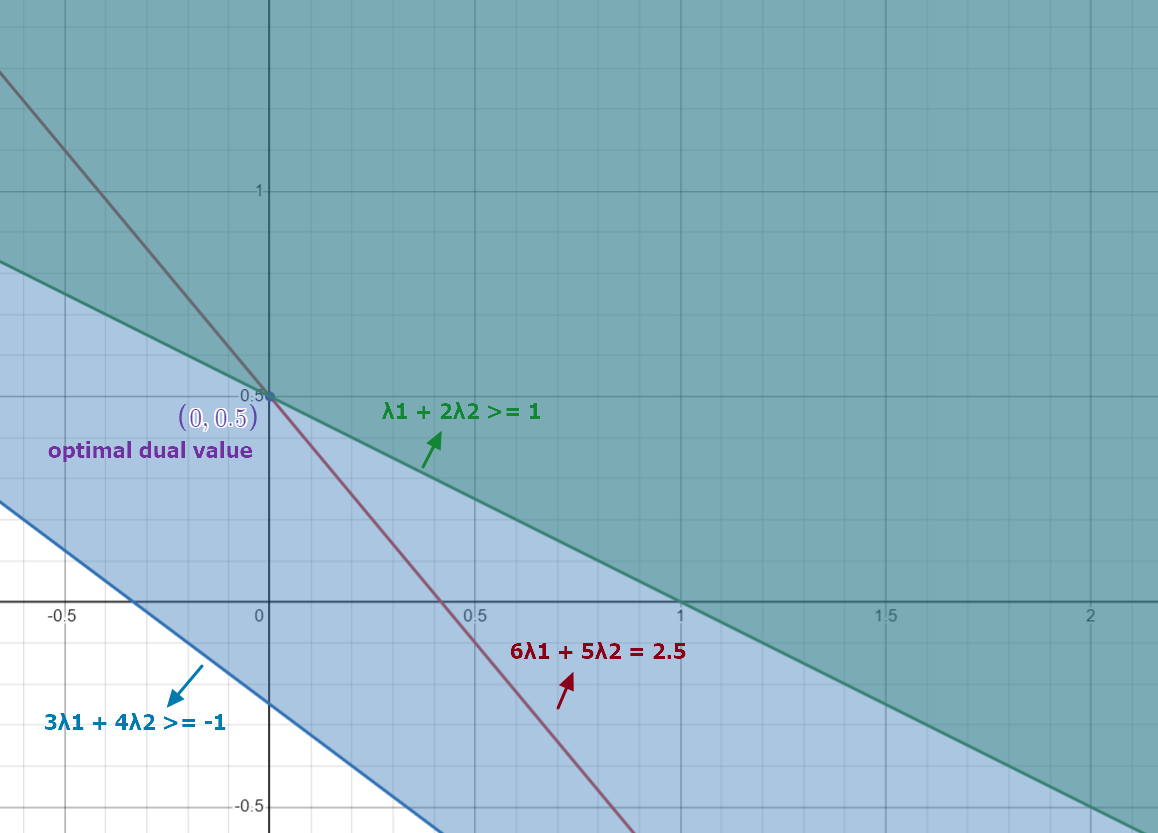

In [9]:
display("image/png", read("p04_graphicalMethod.png"))